In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('youtoxic_english.csv')

In [3]:
data

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False


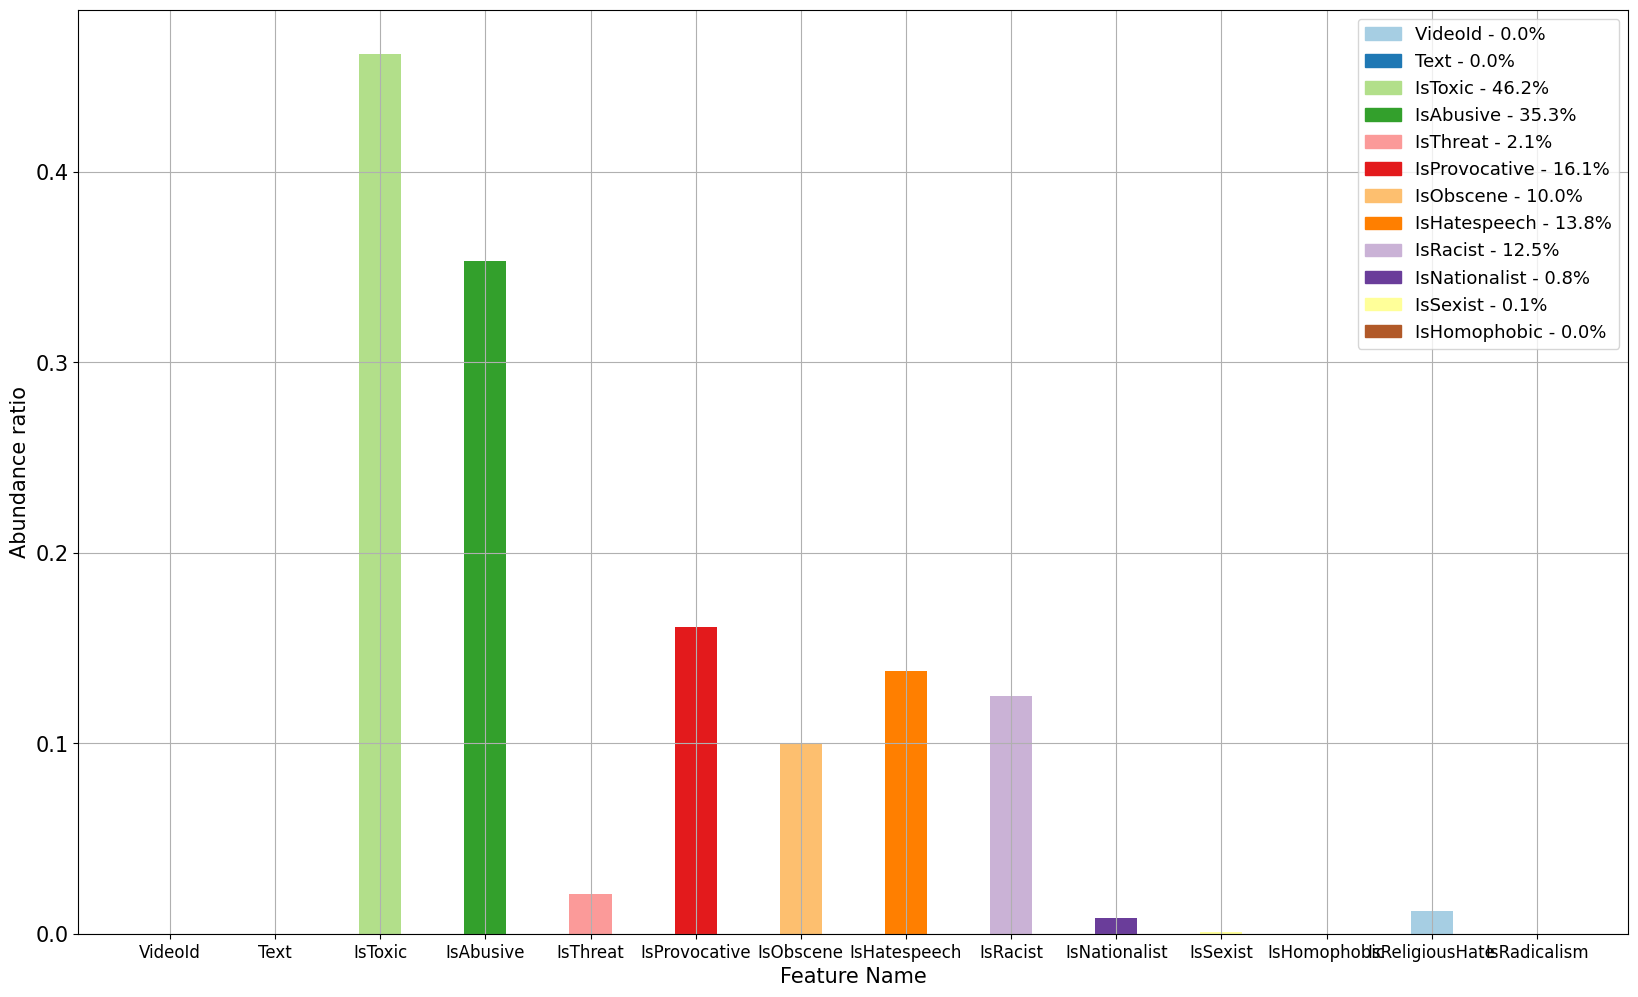

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

columns_names = data.columns.tolist()
bar_data = {}
for name in columns_names[1:]:
    bar_data[name] = len(data.loc[data[name] == 1]) / len(data[name])
    
    
bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (20, 12))
colors = plt.cm.Paired(np.arange(12))

plt.bar(bar_name, values, color = colors,
        width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Feature Name", fontsize=15)
plt.ylabel("Abundance ratio", fontsize=15)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100}%") 
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()

In [5]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [6]:
data.drop(['CommentId', 'VideoId'], axis = 1, inplace = True)

In [7]:
# Розрахуємо кореляційну матрицю для всіх числових ознак нашого набору даних
# Вибераємо стовпець з назвою "IsToxic" з кореляційної матриці.


In [8]:
# corr_matrix = data.corr()
# corr_matrix["IsToxic"].sort_values(ascending = False)

In [9]:
data.drop(["IsRadicalism", "IsHomophobic", "IsSexist", "IsNationalist"],
          axis = 1, inplace = True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(0)

new_data = data["Text"]
target = data["IsToxic"]

comments_train, comments_test, y_train, y_test = train_test_split(new_data, target,
                                                                  test_size=0.30, stratify=target, random_state = 42)

vectorizer = TfidfVectorizer(max_features=2500, min_df=8, max_df=0.8)
vectorizer.fit(comments_train)

x_train = vectorizer.transform(comments_train)
x_test = vectorizer.transform(comments_test)

In [11]:
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

In [12]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train_array, y_train)

In [23]:
from sklearn.tree import DecisionTreeClassifier
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]

            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap, y_bootstrap)
            self.models.append(tree)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0) >= 0.5


random_forest = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
random_forest.fit(x_train_resampled, y_train_resampled)

y_pred = random_forest.predict(x_test_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність RandomForestClassifier: {accuracy}")


Точність RandomForestClassifier: 0.72


In [20]:
joblib.dump(random_forest, 'RandomForestClassifier_balanced_modell.joblib')

['RandomForestClassifier_balanced_modell.joblib']

Confusion Matrix:
[[131  30]
 [ 54  85]]
Precision: 0.7391304347826086
Recall: 0.6115107913669064
F1-Score: 0.6692913385826771
ROC-AUC: 0.7125876938200991


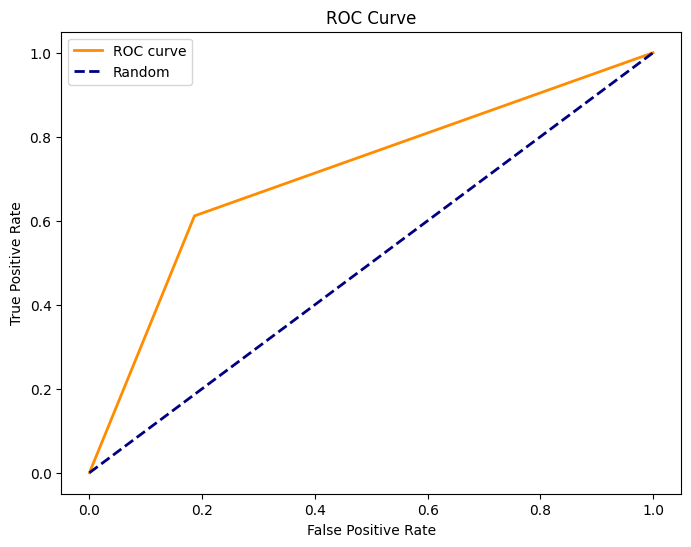

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = random_forest.predict(x_test_array)

# Матриця помилок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Точність (Precision)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Чутливість (Recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-мера (F1-Score)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

# ROC-крива
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()